# Sales data about various goods in shops in various states

# The aim is to predict the sales of each at a particular outlet

In [2]:
# import numpy and padas for basic dataset manipulations
import numpy as np 
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt 
import seaborn as sbn

In [4]:
# reading the datset
data = pd.read_csv('bigmart.csv')

# checking the size of the data
data.shape

(8523, 12)

## The dataset contains 8523 rows of records about sales and 12 column defining each attributes. 

In [5]:
# Checking the head of the dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Apparently there are missing values in the dataset. This means that need to get rid from the missing values. Otherwise the dataset may have not fulfil the requirements required.


In [6]:
# Checking for missing values 
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Here we can see there are missing values are in the following columns called Item_Weight and Outlet_Size
## Compared to removing 1463 or 2410 records impact highly to the predictions created by the model. 
## Therefore we have to overcome the missing value issue by imputing data into the NaN data. 
## For imputing we can use statistical approaches like mean for Item_Weight and mode for Outlet_Size. 

In [7]:
# imputing missing values 

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

## Making sure the dataset is not having any missing values now

In [8]:
# Checking for missing values
data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Its time to looking for any presence of outlier in the dataset
## Looking for having any outliers with the numerical data


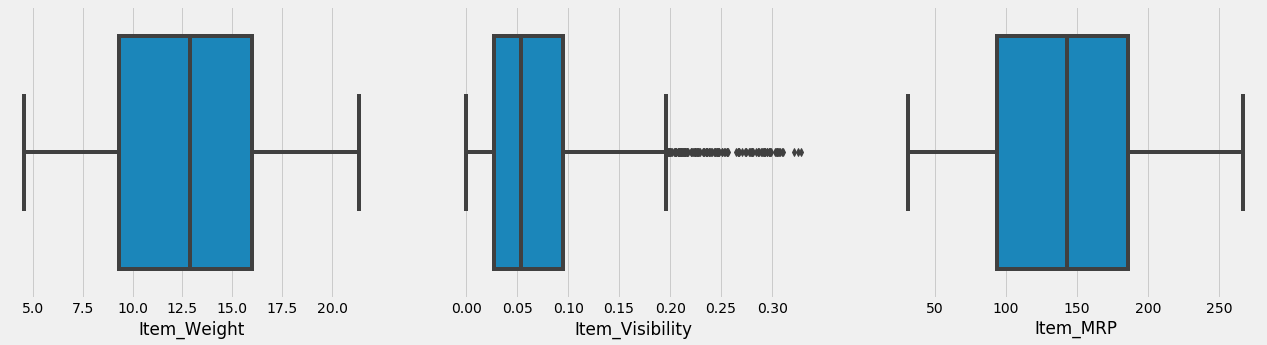

In [15]:
# checking for outliers in the numerical data 
plt.rcParams['figure.figsize'] = (20,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,3,1)
sbn.boxplot(data['Item_Weight'])

plt.subplot(1,3,2)
sbn.boxplot(data['Item_Visibility'])

plt.subplot(1,3,3)
sbn.boxplot(data['Item_MRP'])

## According to the above particulars we may see item_visibility is having an outlier. Then remove the outliers from item visibility column

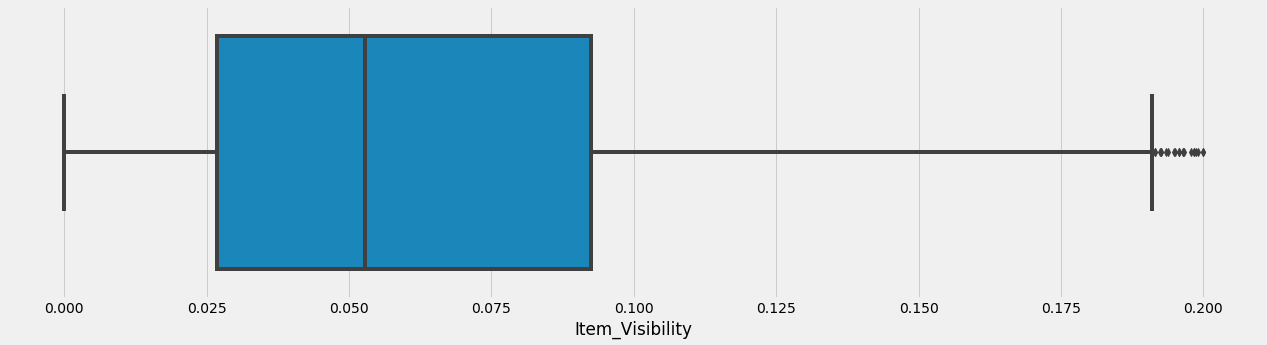

In [18]:
# Item visibility column is printed
data['Item_Visibility']

# According to the box plot diagrams removing values greater than 0.2 will reduce the impact of having outliers. 
data = data[data['Item_Visibility']<=0.2]

# then again check for outliers for item_visibility after removing the outliers
sbn.boxplot(data['Item_Visibility'])

## Now its going to clean the Item_Identifiers. It seems having first two character are general to each record

In [19]:
# Clean the Item_Identifier
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x : x[0:2])

# Count each different item
data['Item_Identifier'].value_counts()

FD    6016
NC    1583
DR     790
Name: Item_Identifier, dtype: int64

## Now there is another issue with the Item_Fat_Content most of words having similar meanings

In [ ]:
# Cleaning low fat values 
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(('low fat', 'LF', 'reg'), ('Low Fat', 'Low Fat', 'Regular'))

# View the changes has been done
data['Item_Fat_Content'].value_counts()